In [1]:
from utils import *

# Logistic Regression

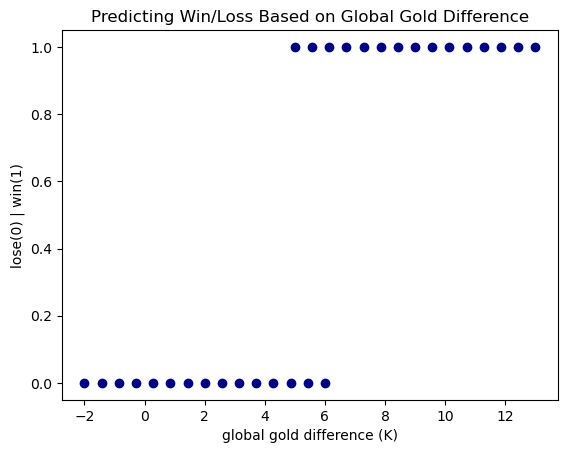

In [2]:
# load data
data = pd.read_csv('game_prediction.csv')
x = data[['gold_difference(K)']]
y = data[['win_or_lose']]

x = np.r_[x]; y = np.r_[y]
N=len(x) 

plt.scatter(x,y, c='navy')
plt.xlabel('global gold difference (K)')  
plt.ylabel('lose(0) | win(1)')
plt.title('Predicting Win/Loss Based on Global Gold Difference')
plt.show()

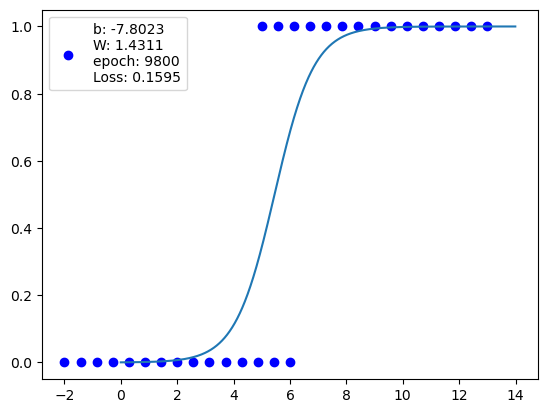

In [3]:
_FILL_ = None

################# initialize hyperparams ######################
learning_rate = 5e-2
epochs = 10000
time_sleep = 0.2
W = 1
b = 1
epoch_interval = 200
#################################################################

loss_list = []
W_list = []
b_list = []
for epoch in range(epochs):
    z = W*x + b
    
    # sigmoid function
    p = np.exp(z)/(1+np.exp(z))  
    
    # Negative log likelihood  
    loss = (-1 * (y * np.log(p) + (1 - y) * np.log(1 - p))).mean()
    
    # compute Gradient 
    p_prime = p - y
    p_prime_W = p_prime*x
    p_prime_b = p_prime*1
    W_grad = p_prime_W.mean()
    b_grad = p_prime_b.mean()
    
    # update
    W = W - learning_rate*W_grad
    b = b - learning_rate*b_grad

    if epoch%epoch_interval == 0 :
        plt.figure()
        x_plot = np.arange(0,14,0.01)
        y_plot = np.exp(W*x_plot + b)/(1+np.exp(W*x_plot + b)) 
        plt.plot(x_plot, y_plot)
        plt.scatter(x, y, c= 'blue', label = f'b: {b:.4f}\nW: {W:.4f}\nepoch: {epoch}\nLoss: {loss:.4f}')
        plt.legend()
        plt.show()
        time.sleep(time_sleep)
        clear_output(wait=True)

        loss_list.append(loss)
        W_list.append(W)
        b_list.append(b)




In [4]:
for l, w, b in zip(loss_list, W_list, b_list):
    print(f"loss:{l:.4f} , W:{w:.4f}, b:{b:.4f}")

loss:1.6286 , W:0.9463, b:0.9795
loss:0.3910 , W:0.3077, b:-0.9995
loss:0.2981 , W:0.4443, b:-1.9404
loss:0.2591 , W:0.5387, b:-2.5541
loss:0.2373 , W:0.6116, b:-3.0130
loss:0.2233 , W:0.6714, b:-3.3822
loss:0.2134 , W:0.7223, b:-3.6925
loss:0.2059 , W:0.7669, b:-3.9610
loss:0.2001 , W:0.8066, b:-4.1984
loss:0.1955 , W:0.8425, b:-4.4115
loss:0.1916 , W:0.8753, b:-4.6051
loss:0.1883 , W:0.9054, b:-4.7826
loss:0.1856 , W:0.9334, b:-4.9466
loss:0.1832 , W:0.9595, b:-5.0992
loss:0.1811 , W:0.9840, b:-5.2419
loss:0.1792 , W:1.0071, b:-5.3759
loss:0.1776 , W:1.0289, b:-5.5023
loss:0.1761 , W:1.0495, b:-5.6219
loss:0.1748 , W:1.0692, b:-5.7354
loss:0.1736 , W:1.0879, b:-5.8434
loss:0.1725 , W:1.1058, b:-5.9465
loss:0.1715 , W:1.1229, b:-6.0450
loss:0.1706 , W:1.1393, b:-6.1394
loss:0.1697 , W:1.1551, b:-6.2299
loss:0.1689 , W:1.1703, b:-6.3169
loss:0.1682 , W:1.1849, b:-6.4007
loss:0.1675 , W:1.1990, b:-6.4814
loss:0.1669 , W:1.2126, b:-6.5593
loss:0.1663 , W:1.2257, b:-6.6345
loss:0.1658 , W

In [43]:
train_indicies = np.random.choice(len(x), int(0.8*len(x)), replace=False)
test_indicies = []
for i in range(len(x)):
    if i not in train_indicies:
        test_indicies.append(i)

x_train = x[train_indicies]
x_test = x[test_indicies]
y_train = y[train_indicies]
y_test = y[test_indicies]
################# initialize hyperparams ######################
learning_rate = 5e-2
epochs = 10000
time_sleep = 0.2
W = 1
b = 1
epoch_interval = 200
#################################################################

loss_list = []
W_list = []
b_list = []
for epoch in range(epochs):
    z = W*x_train + b
    
    # sigmoid function
    p = np.exp(z)/(1+np.exp(z))  
    
    # Negative log likelihood  
    loss = (-1 * (y_train * np.log(p) + (1 - y_train) * np.log(1 - p))).mean()
    
    # compute Gradient 
    p_prime = p - y_train
    p_prime_W = p_prime*x_train
    p_prime_b = p_prime*1
    W_grad = p_prime_W.mean()
    b_grad = p_prime_b.mean()
    
    # update
    W = W - learning_rate*W_grad
    b = b - learning_rate*b_grad

    if epoch%epoch_interval == 0 :
        loss_list.append(loss)
        W_list.append(W)
        b_list.append(b)

z = W_list[-1] * x_test + b_list[-1]
p = np.exp(z)/(1+np.exp(z))
test_loss = (-1 * (y_test * np.log(p) + (1 - y_test) * np.log(1 - p))).mean()

print(f"train_loss:{loss_list[-1]:.4f} , test_loss:{test_loss:.4f}")

train_loss:0.1975 , test_loss:0.0024
